<a href="https://colab.research.google.com/github/Katlynn23/Project1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Katlynn Reed

In [253]:
import pandas as pd
import numpy
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from google.colab import drive
drive.mount('/content/drive')
car = pd.read_csv('/content/drive/MyDrive/CS167datasets/CarPricesProject1.csv')
car

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,NaN,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [254]:
car['cylindernumber'].replace(["two","three","four","five","six","eight","twelve"],[2,3,4,5,6,8,12],inplace=True)
car['fueltype'].replace(['gas','diesel'],[0,1],inplace=True)
car['aspiration'].replace(['std','turbo'],[0,1],inplace=True)
car['doornumber'].replace(['two','four'],[0,1],inplace=True)
car['enginelocation'].replace(['front','rear'],[0,1],inplace=True)
car_dummy=pd.get_dummies(car,columns=['drivewheel','enginetype','fuelsystem'])
car_dummy

,symboling,CarName,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,alfa-romero giulia,0.0,0.0,0.0,convertible,0.0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3.0,alfa-romero stelvio,0.0,0.0,0.0,convertible,0.0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1.0,alfa-romero Quadrifoglio,0.0,0.0,0.0,hatchback,0.0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2.0,audi 100 ls,0.0,0.0,1.0,sedan,0.0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2.0,audi 100ls,0.0,0.0,1.0,sedan,0.0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,volvo 145e (sw),0.0,0.0,1.0,sedan,0.0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1.0,volvo 144ea,0.0,1.0,1.0,sedan,0.0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1.0,volvo 244dl,0.0,0.0,1.0,sedan,0.0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1.0,volvo 246,1.0,1.0,1.0,sedan,0.0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [255]:
car.isna().any()

symboling           True
CarName             True
fueltype            True
aspiration          True
doornumber          True
carbody             True
drivewheel          True
enginelocation      True
wheelbase           True
carlength           True
carwidth            True
carheight           True
curbweight          True
enginetype          True
cylindernumber      True
enginesize          True
fuelsystem          True
boreratio           True
stroke              True
compressionratio    True
horsepower          True
peakrpm             True
citympg             True
highwaympg          True
price               True
dtype: bool

In [256]:
#Change all numerical values so you dont loose a large chunk of data
sym_mean= car_dummy['symboling'].mean()
car_dummy['symboling'].fillna(sym_mean, inplace=True)
type_mean= car_dummy['fueltype'].mean()
car_dummy['fueltype'].fillna(type_mean, inplace=True)
asp_mean= car_dummy['aspiration'].mean()
car_dummy['aspiration'].fillna(asp_mean, inplace=True)
doornum_mean= car_dummy['doornumber'].mean()
car_dummy['doornumber'].fillna(doornum_mean, inplace=True)
loc_mean= car_dummy['enginelocation'].mean()
car_dummy['enginelocation'].fillna(loc_mean, inplace=True)
wheelbase_mean= car_dummy['wheelbase'].mean()
car_dummy['wheelbase'].fillna(wheelbase_mean, inplace=True)
carlength_mean= car_dummy['carlength'].mean()
car_dummy['carlength'].fillna(carlength_mean, inplace=True)
carwidth_mean= car_dummy['carwidth'].mean()
car_dummy['carwidth'].fillna(carwidth_mean, inplace=True)
carheight_mean= car_dummy['carheight'].mean()
car_dummy['carheight'].fillna(carheight_mean, inplace=True)
curbweight_mean= car_dummy['curbweight'].mean()
car_dummy['curbweight'].fillna(curbweight_mean, inplace=True)
cyl_mean= car_dummy['cylindernumber'].mean()
car_dummy['cylindernumber'].fillna(cyl_mean, inplace=True)
enginesize_mean= car_dummy['enginesize'].mean()
car_dummy['enginesize'].fillna(enginesize_mean, inplace=True)
boreratio_mean= car_dummy['boreratio'].mean()
car_dummy['boreratio'].fillna(boreratio_mean, inplace=True)
stroke_mean= car_dummy['stroke'].mean()
car_dummy['stroke'].fillna(stroke_mean, inplace=True)
compressionratio_mean= car_dummy['compressionratio'].mean()
car_dummy['compressionratio'].fillna(compressionratio_mean, inplace=True)
horsepower_mean= car_dummy['horsepower'].mean()
car_dummy['horsepower'].fillna(horsepower_mean, inplace=True)
peakrpm_mean= car_dummy['peakrpm'].mean()
car_dummy['peakrpm'].fillna(peakrpm_mean, inplace=True)
citympg_mean= car_dummy['citympg'].mean()
car_dummy['citympg'].fillna(citympg_mean, inplace=True)
highwaympg_mean= car_dummy['highwaympg'].mean()
car_dummy['highwaympg'].fillna(highwaympg_mean, inplace=True)
price_mean= car_dummy['price'].mean()
car_dummy['price'].fillna(price_mean, inplace=True)
car_dummy= car_dummy[car_dummy['carbody'].notna()]
print('after:',car_dummy.isna().any())

after: symboling           False
CarName              True
fueltype            False
aspiration          False
doornumber          False
carbody             False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
cylindernumber      False
enginesize          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
drivewheel_4wd      False
drivewheel_fwd      False
drivewheel_rwd      False
enginetype_dohc     False
enginetype_dohcv    False
enginetype_l        False
enginetype_ohc      False
enginetype_ohcf     False
enginetype_ohcv     False
enginetype_rotor    False
fuelsystem_1bbl     False
fuelsystem_2bbl     False
fuelsystem_4bbl     False
fuelsystem_idi      False
fuelsystem_mfi      False
fuelsystem_mpfi     False
fuels

In [257]:
predictors = ['doornumber', 'carlength','carwidth', 'carheight']
target = "price"
train_data, test_data, train_sln, test_sln = \
        train_test_split(car_dummy[predictors], car_dummy[target], test_size = 0.2, random_state=41)
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)


train_data shape:  (163, 4)
test_data shape:  (41, 4)
train_sln shape:  (163,)
test_sln shape:  (41,)


In [258]:
from sklearn import metrics
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
#Not Normalized
neigh= neighbors.KNeighborsRegressor()
neigh.fit(train_data,train_sln)
predictions =neigh.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  27721803.13992313
r2:  0.27644868787101196


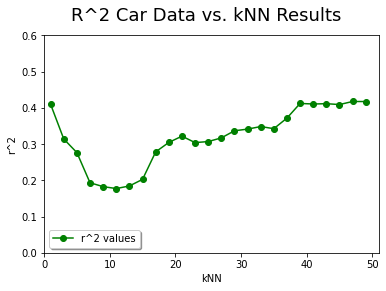

In [259]:
import matplotlib.pyplot as plt
%matplotlib inline

k_vals= range(1,50,2)
r2_vals =[]

for k in k_vals:
  neigh =neighbors.KNeighborsRegressor(n_neighbors=k)
  neigh.fit(train_data,train_sln)
  predictions = neigh.predict(test_data)
  r2_val=sklearn.metrics.r2_score(test_sln,predictions)
  r2_vals.append(r2_val)

plt.suptitle('R^2 Car Data vs. kNN Results',fontsize=18)
plt.xlabel('kNN')
plt.ylabel('r^2')
plt.plot(k_vals,r2_vals,'go-',label='r^2 values')
plt.legend(loc='lower left',shadow=True)
plt.axis([0,51,0,0.6])
plt.show()


In [260]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
neigh= neighbors.KNeighborsRegressor(n_neighbors=27)
neigh.fit(train_data_normalized,train_sln)
predictions =neigh.predict(test_data_normalized)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))


MSE:  23424196.79550177
r2:  0.3886181125590398


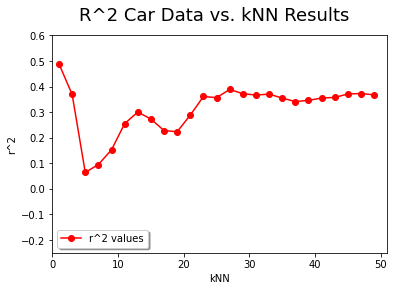

In [261]:
import matplotlib.pyplot as plt
%matplotlib inline

k_vals= range(1,50,2)
r2_vals =[]

for k in k_vals:
  neigh =neighbors.KNeighborsRegressor(n_neighbors=k)
  neigh.fit(train_data_normalized,train_sln)
  predictions = neigh.predict(test_data_normalized)
  r2_val=sklearn.metrics.r2_score(test_sln,predictions)
  r2_vals.append(r2_val)

plt.suptitle('R^2 Car Data vs. kNN Results',fontsize=18)
plt.xlabel('kNN')
plt.ylabel('r^2')
plt.plot(k_vals,r2_vals,'ro-',label='r^2 values')
plt.legend(loc='lower left',shadow=True)
plt.axis([0,51,-0.25,0.6])
plt.show()

In [262]:
dt = tree.DecisionTreeRegressor(random_state=27)
dt.fit(train_data,train_sln)
car_predictions = dt.predict(test_data)
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  24232610.248956673
r2:  0.36751816418852246


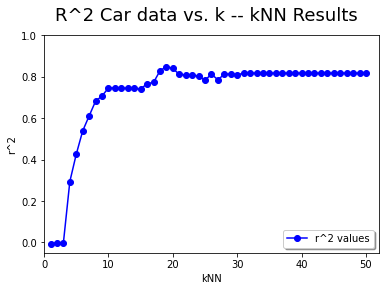

In [263]:
import matplotlib.pyplot as plt
%matplotlib inline

max_depth_vals = range(1,51)
norm = []

for max_depth_val in max_depth_vals:
    dt = tree.DecisionTreeRegressor(random_state = 0, max_depth = max_depth_val, criterion="poisson")
    dt.fit(train_data_normalized,train_sln)
    predictions = dt.predict(test_data_normalized)
    norm.append(metrics.r2_score(test_sln, predictions))

plt.suptitle('R^2 Car data vs. k -- kNN Results',fontsize=18)
plt.xlabel('kNN')
plt.ylabel('r^2')
plt.plot(max_depth_vals,norm,'bo-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,52,-0.05,1])
plt.show()

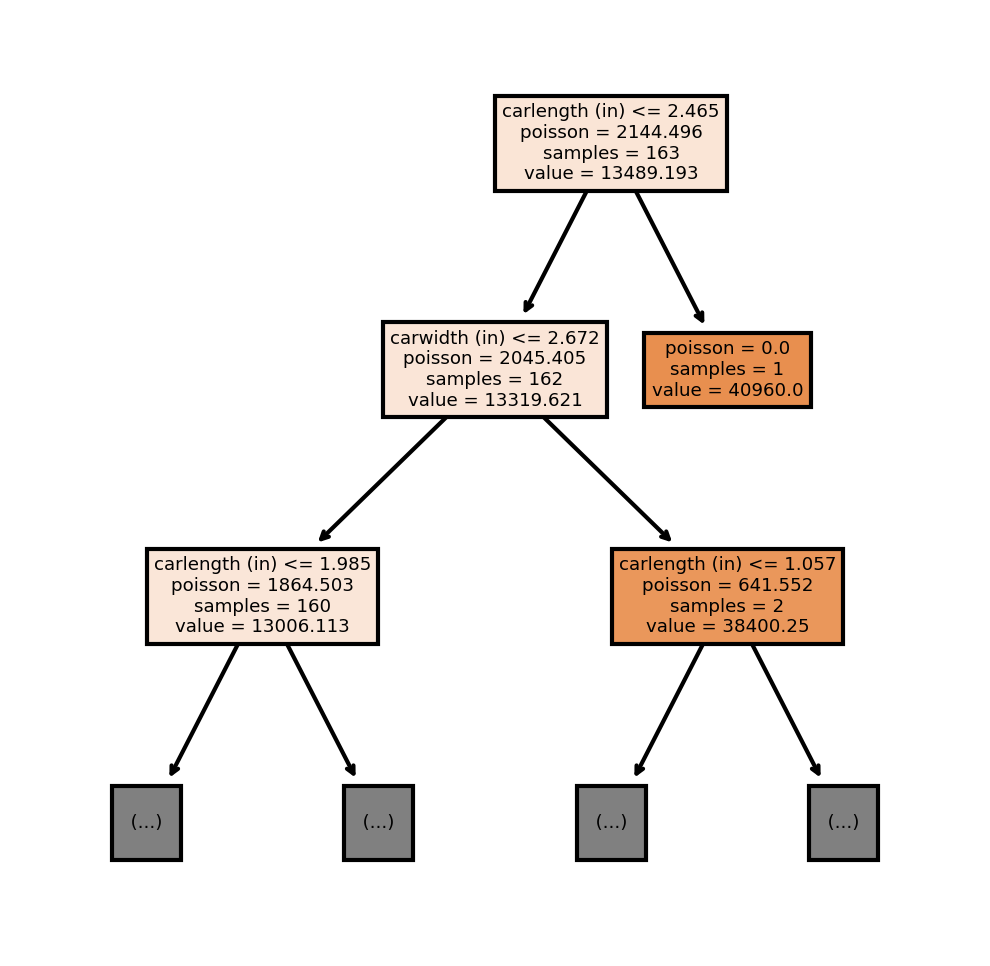

In [264]:
import matplotlib.pyplot as plt
fn=['doornumber (#)','carlength (in)','carwidth (in)','carheight (in)']
cn=['price']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt, 
               max_depth=2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Had to add a max depth otherwise it couldn't be read it was far to long to follow although it is the most accurate according to calculations

In [265]:
shuffled_data=car_dummy.sample(frac=1,random_state=41)
test_data2=shuffled_data.iloc[0:40]
train_data2=shuffled_data.iloc[40:]

In [294]:
def classify_kNN(new_example,train_data2,k):
  train_data2_copy=train_data2.copy()
  train_data2_copy['distance_to_new']=numpy.sqrt(
      (new_example['enginelocation']-train_data2_copy['enginelocation'])**2
      +(new_example['carlength']-train_data2_copy['carlength'])**2
      +(new_example['carheight']-train_data2_copy['carheight'])**2
      +(new_example['carwidth']-train_data2_copy['carwidth'])**2
      +(new_example['curbweight']-train_data2_copy['curbweight'])**2)
  sorted_data=train_data2_copy.sort_values(['distance_to_new'])
  prediction = sorted_data.iloc[0:k]['carbody'].mode().iloc[0]
  return prediction

In [271]:
def accuracy(actual,predicted):
  num_correct =0
  for i in range(len(actual)):
    if actual.iloc[i] == predicted.iloc[i]:
      num_correct +=1
  frac_correct = num_correct/len(actual)
  return frac_correct

In [272]:
def classify_all_kNN(test_data2,train_data2,k):
  results = []
  for i in range(len(test_data2)):
    prediction = classify_kNN(test_data2.iloc[i],train_data2,k)
    results.append(prediction)
  return pd.Series(results)

In [297]:
predictions5NN= classify_all_kNN(test_data2,train_data2,19)
print('ACTUAL\t\tPREDICTIONS')
for i in range(len(test_data2)):
  print(test_data2['carbody'].iloc[i],"---",predictions5NN.iloc[i] )
acc =accuracy(test_data2['carbody'],predictions5NN)
print('accuracy:',acc)

ACTUAL		PREDICTIONS
wagon --- hatchback
sedan --- sedan
convertible --- sedan
sedan --- sedan
wagon --- sedan
hatchback --- wagon
wagon --- sedan
sedan --- hatchback
hatchback --- hatchback
hatchback --- sedan
hatchback --- hatchback
hatchback --- hatchback
hatchback --- hatchback
sedan --- sedan
hatchback --- wagon
hardtop --- wagon
sedan --- hatchback
wagon --- sedan
hatchback --- sedan
hatchback --- hatchback
convertible --- sedan
sedan --- sedan
sedan --- sedan
sedan --- sedan
sedan --- sedan
hatchback --- sedan
hatchback --- sedan
wagon --- sedan
hatchback --- sedan
sedan --- sedan
sedan --- sedan
sedan --- sedan
hatchback --- hatchback
sedan --- hatchback
hatchback --- sedan
hatchback --- sedan
hardtop --- wagon
sedan --- sedan
sedan --- sedan
sedan --- sedan
accuracy: 0.475


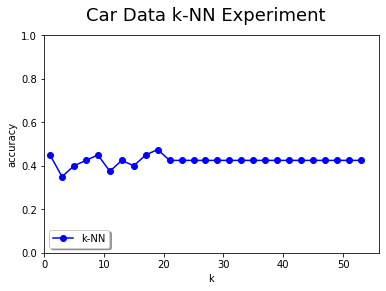

In [296]:
import matplotlib.pyplot as plt
%matplotlib inline
k_vals = range(1,55,2)
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data2,train_data2,k)
    current_accuracy = accuracy(test_data2['carbody'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Car Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'bo-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,56,0,1])

plt.show()

In [298]:
loc_mean = train_data2['enginelocation'].mean()
loc_std = train_data2['enginelocation'].std()

length_mean = train_data2['carlength'].mean()
length_std = train_data2['carlength'].std()

height_mean = train_data2['carheight'].mean()
height_std = train_data2['carheight'].std()

peak_mean = train_data2['peakrpm'].mean()
peak_std = train_data2['peakrpm'].std()

city_mean = train_data2['citympg'].mean()
city_std = train_data2['citympg'].std()

curb_mean = train_data2['curbweight'].mean()
curb_std = train_data2['curbweight'].std()

In [299]:
train_norm_data = train_data2.copy()
test_norm_data = test_data2.copy()

# update the columns in train_norm_data 
train_norm_data['enginelocation'] = (train_data2['enginelocation'] - loc_mean)/loc_std
train_norm_data['carlength'] = (train_data2['carlength'] - length_mean)/length_std
train_norm_data['carheight'] = (train_data2['carheight'] - height_mean)/height_std
train_norm_data['peakrpm'] = (train_data2['peakrpm'] - peak_mean)/peak_std
train_norm_data['citympg'] = (train_data2['citympg'] - city_mean)/city_std
train_norm_data['curbweight'] = (train_data2['curbweight'] - curb_mean)/curb_std

test_norm_data['enginelocation'] = (test_data2['enginelocation'] - loc_mean)/loc_std
test_norm_data['carlength'] = (test_data2['carlength'] - length_mean)/length_std
test_norm_data['carheight'] = (test_data2['carheight'] - height_mean)/height_std
test_norm_data['peakrpm'] = (test_data2['peakrpm'] - peak_mean)/peak_std
test_norm_data['citympg'] = (test_data2['citympg'] - city_mean)/city_std
test_norm_data['curbweight'] = (test_data2['curbweight'] - curb_mean)/curb_std


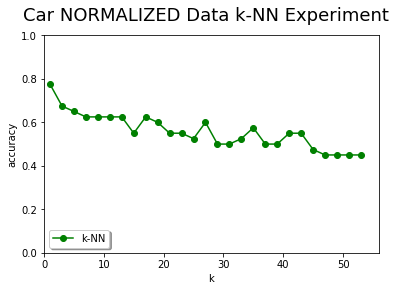

In [301]:
k_vals = range(1,55,2)
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_norm_data,train_norm_data,k)
    current_accuracy = accuracy(test_norm_data['carbody'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Car NORMALIZED Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'go-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,56,0,1])

plt.show()

In [322]:
car_dummy.astype({'enginelocation':'int32'}).dtypes
car_dummy.astype({'carlength':'int32'}).dtypes
car_dummy.astype({'carwidth':'int32'}).dtypes
car_dummy.astype({'carheight':'int32'}).dtypes
car_dummy.astype({'curbweight':'int32'}).dtypes
predictor2 = ['enginelocation', 'carlength','carwidth', 'carheight','curbweight']
target = "carbody"
train_data3, test_data3, train_sln, test_sln2 = \
        train_test_split(car_dummy[predictors], car_dummy[target], test_size = 0.2, random_state=41)

In [325]:
dt = tree.DecisionTreeClassifier(random_state = 0)
dt.fit(train_data,train_sln)
predictions2=dt.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln,predictions2))
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(predictions2[i],"\t\t", test_sln.iloc[i])

Accuracy: 0.8292682926829268
___PREDICTED___ 	  ___ACTUAL___
wagon 		 wagon
sedan 		 sedan
sedan 		 convertible
sedan 		 sedan
wagon 		 wagon
hatchback 		 hatchback
wagon 		 wagon
sedan 		 sedan
hatchback 		 hatchback
sedan 		 hatchback
hatchback 		 hatchback
hatchback 		 hatchback
hatchback 		 hatchback
sedan 		 sedan
hardtop 		 hatchback
hardtop 		 hardtop
sedan 		 sedan
wagon 		 wagon
hatchback 		 hatchback
hatchback 		 hatchback
hatchback 		 convertible
sedan 		 sedan
convertible 		 sedan
sedan 		 sedan
sedan 		 sedan
hardtop 		 hatchback
hatchback 		 hatchback
wagon 		 wagon
hatchback 		 hatchback
sedan 		 sedan
sedan 		 sedan
sedan 		 sedan
hatchback 		 hatchback
sedan 		 sedan
hatchback 		 hatchback
hatchback 		 hatchback
hardtop 		 hardtop
hatchback 		 sedan
sedan 		 sedan
sedan 		 sedan
hatchback 		 hatchback


In [346]:
predictions2

array(['wagon', 'sedan', 'sedan', 'sedan', 'wagon', 'hatchback', 'wagon',
       'sedan', 'hatchback', 'sedan', 'hatchback', 'hatchback',
       'hatchback', 'sedan', 'hardtop', 'hardtop', 'sedan', 'wagon',
       'hatchback', 'hatchback', 'hatchback', 'sedan', 'convertible',
       'sedan', 'sedan', 'hardtop', 'hatchback', 'wagon', 'hatchback',
       'sedan', 'sedan', 'sedan', 'hatchback', 'sedan', 'hatchback',
       'hatchback', 'hardtop', 'hatchback', 'sedan', 'sedan', 'hatchback'],
      dtype=object)

Text(0.5, 0, 'Predicted label')

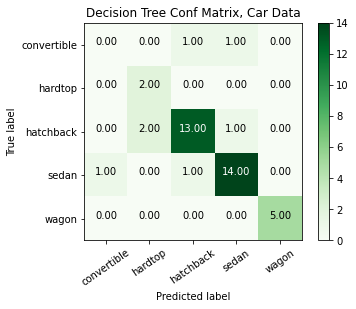

In [358]:
import itertools

cm=metrics.confusion_matrix(test_sln,predictions2)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Greens)
plt.title('Decision Tree Conf Matrix, Car Data')
plt.colorbar()
plt.xticks([0,1,2,3,4], dt.classes_,rotation=35)
plt.yticks([0,1,2,3,4], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')